In [1]:
import json
import os

In [2]:
import src.utils as utils

## Define Parameters

In [3]:
example_data_path = 'data_example.json'
with open(example_data_path, 'r') as example_f:
    example_data = json.load(example_f)

skeleton_keys = ['elbow_left', 'elbow_right', 'hand_left', 'hand_right', 'head','sholder_center', 'sholder_left', 'sholder_right', 'wrist_left', 'wrist_right']

In [4]:
animation_interval = 200  # Animation frame interval
animation_frames = 2000  # Total animation frames
test = True

## Visualization

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '2000x2000', '-pix_fmt', 'rgba', '-framerate', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'data_example_vis.mp4']' returned non-zero exit status 255.

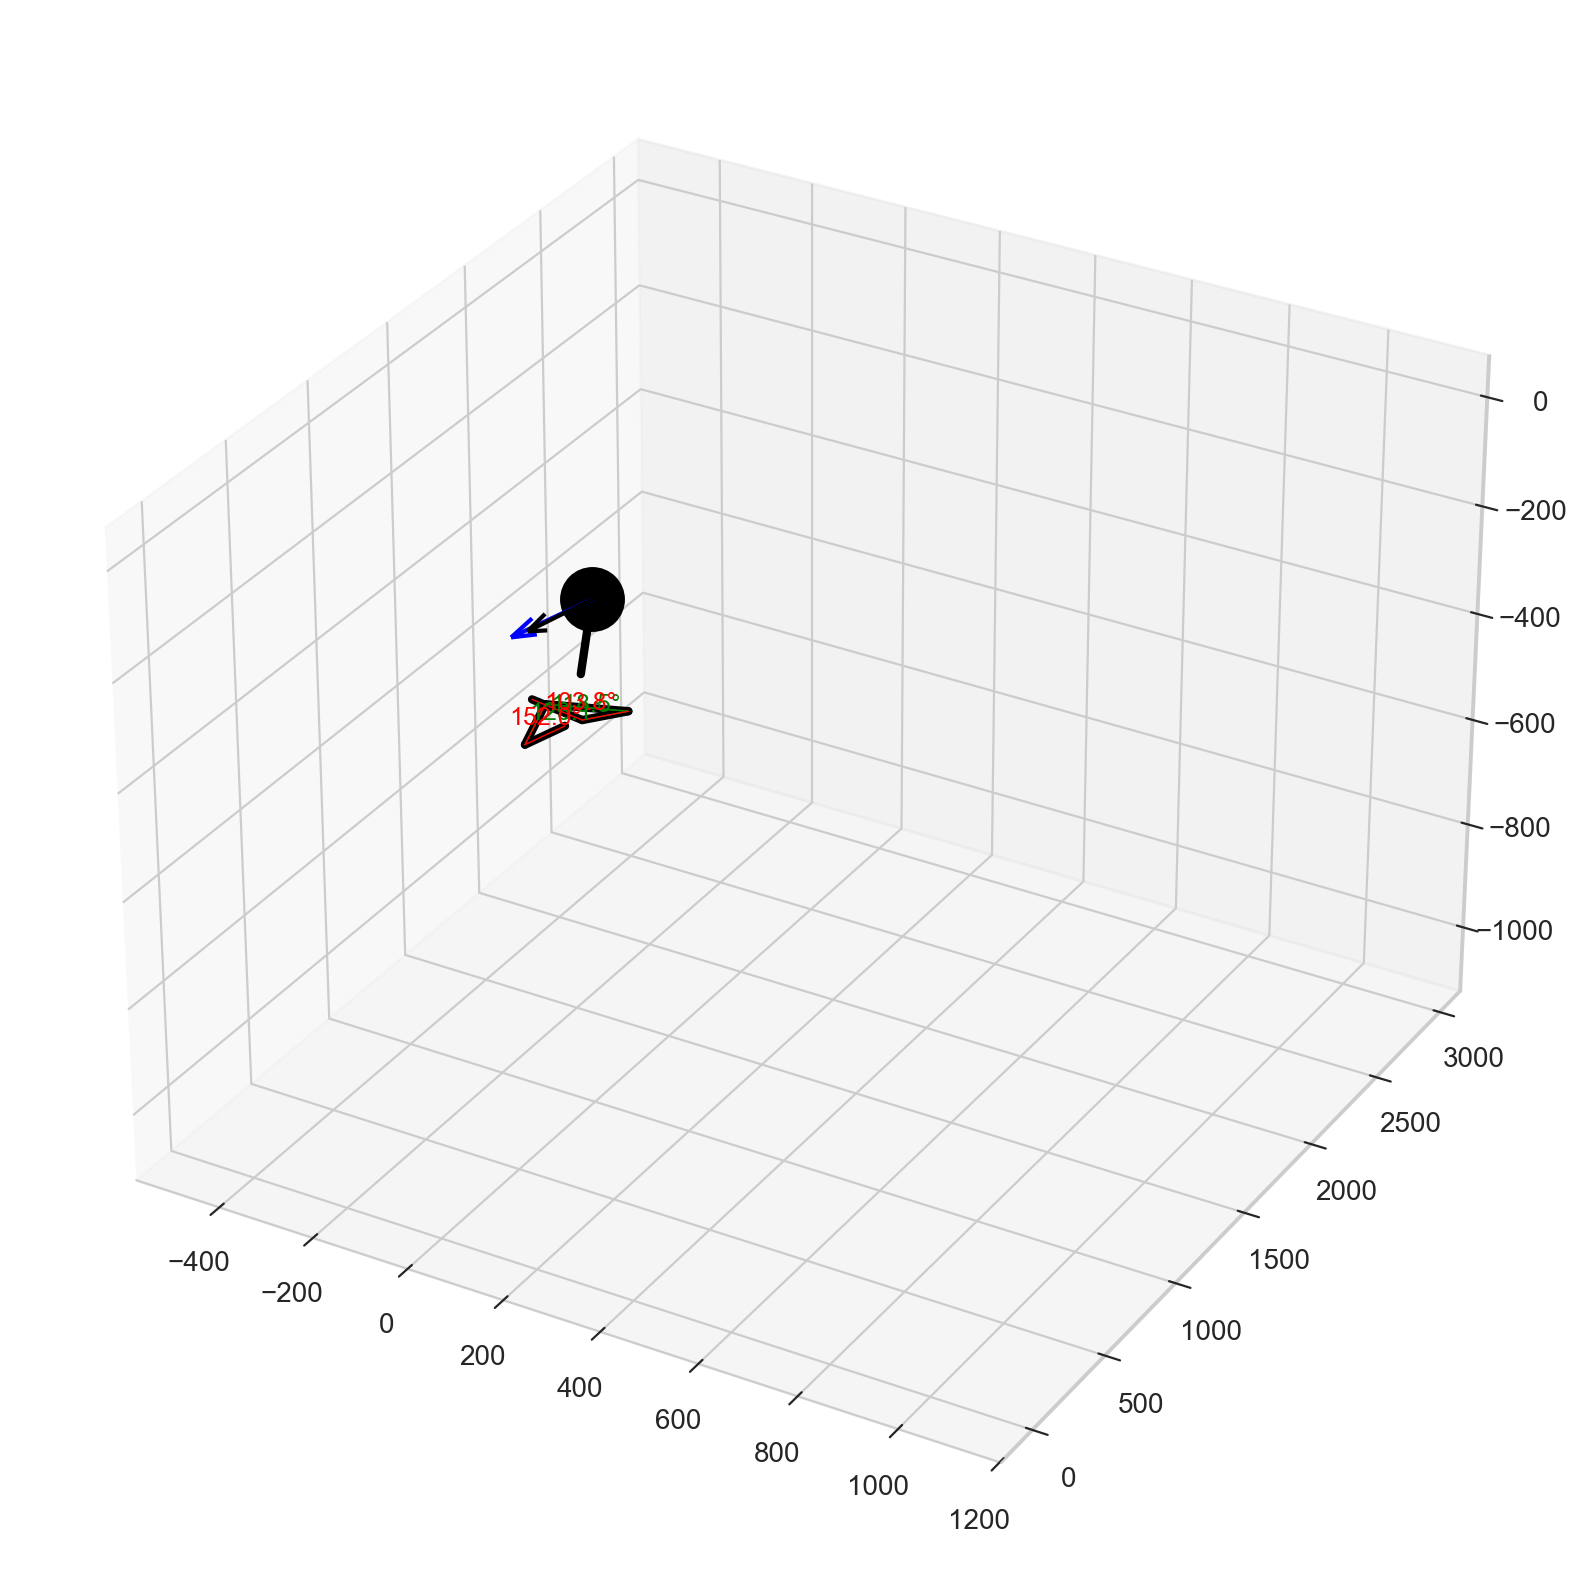

In [5]:
utils.visualize(example_data, skeleton_keys, animation_frames, animation_interval, example_data_path)

In [ ]:
if not test:
    root_path = 'dataset'
    users = [user for user in sorted(os.listdir(root_path)) if user != '.DS_Store']

    for user in users:
        sessions_path = os.path.join(root_path, user)

        sessions = sorted(os.listdir(sessions_path))
        sessions = [session for session in sessions if
                    ('initial diagnosis' in session.lower()
                     or 'diagnosis abilities' in session.lower()
                     and os.path.splitext(session)[1] == '.json')]

        for session in sessions:
            session_path = os.path.join(sessions_path, session)

            with open(session_path, 'r') as file:
                data = json.load(file)

            print(user, session, data['task'])
            utils.visualize(data, skeleton_keys, animation_frames,animation_interval, session_path)